<table align="left">
<tr>

<th, style="background-color:white">
<img src="https://github.com/mlgill/ODSC_East_2017_PythonNLP/blob/master/assets/logo.png?raw=true", width=140, height=100>
</th>

<th, style="background-color:white">
<div align="left">
<h1>Learning from Text: <br> Introduction to Natural Language Processing with Python</h1>  
<h2>Michelle L. Gill, Ph.D.</h2>     
Senior Data Scientist, Metis  
ODSC East  
May 3, 2017 
</div>
</th>

</tr>
</table>  

## Heirarchical Clustering Walkthrough

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

%matplotlib inline

## The Data

Create two regions of random data for clustering, one centered at (1, 1) and one centered at (3, 1).

In [60]:
n_points_cluster = 10

data = np.append(np.random.normal(1, 1, (n_points_cluster, 2)), 
                 np.random.normal(3, 1, (n_points_cluster, 2)), 
                 axis = 0)

real_id = np.append([1]*n_points_cluster, [2]*n_points_cluster)

print(data.shape)

(20, 2)


Visualize the results.

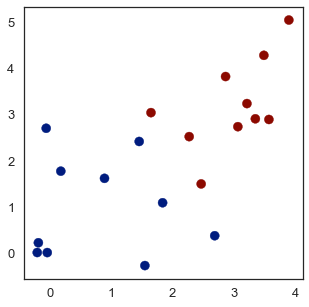

In [61]:
# custom red/blue palette
palette = {1:sns.color_palette()[0], 2:sns.color_palette()[2]}
colors = [palette[x] for x in real_id]

fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.scatter(data[:,0], data[:,1], 
            c=colors);

## Calculate Distances

[Pairwise distance metrics](http://scikit-learn.org/stable/modules/metrics.html#metrics) can be used for calculating distances and similarities. First the cosine similarity.

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

sim_cosine = cosine_similarity(data)

print(sim_cosine.shape)

(20, 20)


Convert the cosine similarity measurements to a distance.

In [63]:
dist_cosine = 1. - sim_cosine

Calculate the Euclidean distances.

In [64]:
from sklearn.metrics.pairwise import euclidean_distances

dist_euc = euclidean_distances(data)

## Calculate Linkage Matrix

Calculate a [linkage matrix](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage), which is used in hierarchical clustering. The linkage matrix will be calculated using the [average](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.cluster.hierarchy.average.html#scipy.cluster.hierarchy.average) and [ward](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.cluster.hierarchy.ward.html) linkages.

In [65]:
from scipy.cluster.hierarchy import average

linkage_matrix_average = average(dist_euc)

print(linkage_matrix_average.shape)

(19, 4)


/Volumes/Files/miniconda/envs/scienv3/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:312: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


In [66]:
from scipy.cluster.hierarchy import ward

linkage_matrix_ward = ward(dist_euc)

print(linkage_matrix_ward.shape)

(19, 4)


/Volumes/Files/miniconda/envs/scienv3/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


## Visualize Linkage Matrices with Dendrograms

A [dendrogram](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) can be used to visualize a linkage matrix.

First, the dendrogram from the average linkage matrix.

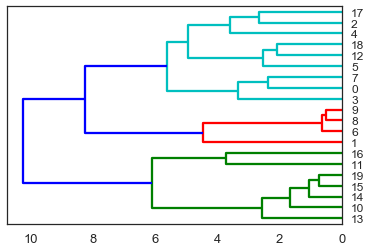

In [67]:
from scipy.cluster.hierarchy import dendrogram

plt.show(dendrogram(linkage_matrix_average, orientation= "left"))

Then the dendrogram from the ward distance.

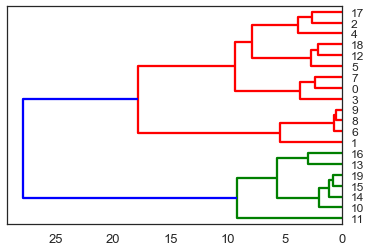

In [68]:
plt.show(dendrogram(linkage_matrix_ward, orientation= "left"))

## Fcluster

Create flat clusters with [fcluster](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.cluster.hierarchy.fcluster.html) and plot the results.

In [69]:
from scipy.cluster.hierarchy import fcluster

k = 2
clusters1 = fcluster(linkage_matrix_ward, k, criterion='maxclust')
print(clusters1)

[2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 2 2 1]


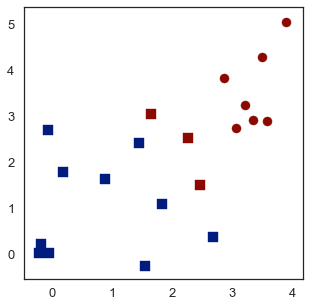

In [70]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

marker_dict = {1:'o', 2:'s'}
markers = [marker_dict[x] for x in clusters1]

for x,y,c,m in zip(data[:,0], data[:,1], colors, markers):
    ax.scatter(x, y, c=c, marker=m)

In [71]:
k = 2
clusters2 = fcluster(linkage_matrix_average, k, criterion='maxclust')
print(clusters2)

[2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 2 2 1]


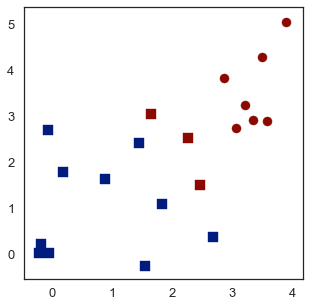

In [72]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

marker_dict = {1:'o', 2:'s'}
markers = [marker_dict[x] for x in clusters2]

for x,y,c,m in zip(data[:,0], data[:,1], colors, markers):
    ax.scatter(x, y, c=c, marker=m)